In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Task:
- merge mileage from Activities into Marathon Plan 

## Plan dataframe

- Create proper 'Day' column with just the day (no time), in datetime format

In [9]:
plan = pd.read_csv('data/Daily Tracker - Marathon Plan.csv')
plan

,Unnamed: 0,Unnamed: 1,days left,wks left,Phase,Event,Run Type,Distance\n(scheduled),Target,Run Type.1,Distance \n(actual),Target.1,weekly total?,rolling average?,Unnamed: 14
0,4/21/2024,Sun,189.0,27.0,recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/22/2024,Mon,188.0,26.0,recovery,last day at rakuten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4/23/2024,Tue,187.0,26.0,recovery,first day as a free man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/24/2024,Wed,186.0,26.0,recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4/25/2024,Thu,185.0,26.0,recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,10/23/2024,Wed,4.0,0.0,taper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,10/24/2024,Thu,3.0,0.0,taper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,10/25/2024,Fri,2.0,0.0,taper,NaN,speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,10/26/2024,Sat,1.0,0.0,taper,travel,shakeout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
plan['Date'] = pd.to_datetime(plan['Unnamed: 0'])
plan

,Unnamed: 0,Unnamed: 1,days left,wks left,Phase,Event,Run Type,Distance\n(scheduled),Target,Run Type.1,Distance \n(actual),Target.1,weekly total?,rolling average?,Unnamed: 14,Date
0,4/21/2024,Sun,189.0,27.0,recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-21
1,4/22/2024,Mon,188.0,26.0,recovery,last day at rakuten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-22
2,4/23/2024,Tue,187.0,26.0,recovery,first day as a free man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23
3,4/24/2024,Wed,186.0,26.0,recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-24
4,4/25/2024,Thu,185.0,26.0,recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,10/23/2024,Wed,4.0,0.0,taper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-23
187,10/24/2024,Thu,3.0,0.0,taper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-24
188,10/25/2024,Fri,2.0,0.0,taper,NaN,speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-25
189,10/26/2024,Sat,1.0,0.0,taper,travel,shakeout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-26


In [11]:
plan['Day'] = plan['Date'].dt.date
plan['Day']

0      2024-04-21
1      2024-04-22
2      2024-04-23
3      2024-04-24
4      2024-04-25
          ...    
186    2024-10-23
187    2024-10-24
188    2024-10-25
189    2024-10-26
190    2024-10-27
Name: Day, Length: 191, dtype: object

## Activities dataframe

Tasks:
- Sum up run distances for each day
- Create proper 'Day' column with just the day (no time), in datetime format

In [30]:
# Load data

activities = pd.read_csv('data/Activities.csv')
activities

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,False,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,...,0.0,0:00,No,00:03:28.8,2,0.0,00:09:08,00:11:45,19,40
1,Running,2024-05-08 21:03:33,False,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,...,0.0,0:00,No,00:01:56.2,1,0.0,00:01:50,00:02:27.8,23,55
2,Running,2024-05-08 19:59:32,False,Tama Ward Running,5.51,344,00:32:08,150,171,154,...,0.0,0:00,No,00:03:01.3,6,0.0,00:32:03,00:33:33,16,40
3,Running,2024-05-07 18:39:11,False,Tama Ward Running,6.00,377,00:36:05,146,163,156,...,0.0,0:00,No,00:00:01.0,7,0.0,00:36:03,00:41:22,17,43
4,Running,2024-05-06 21:55:53,False,Tama Ward Running,1.68,99,00:10:17,135,150,149,...,0.0,0:00,No,00:04:06.6,2,0.0,00:10:11,00:10:39,20,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Running,2020-08-11 22:19:18,False,Kochi Shi - Steady State Run,6.70,433,00:35:00,154,179,159,...,0.0,0:00,No,00:00:11.2,9,0.0,00:34:35,00:36:46,4,15
979,Running,2020-08-10 16:51:04,False,Shimanto Shi Running,4.24,280,00:22:14,155,167,155,...,0.0,0:00,No,00:01:12.9,5,0.0,00:21:09,00:23:19,2,14
980,Incident Detected,2020-08-10 16:44:51,False,Shimanto Shi Incident Detected,0.01,1,00:00:11.0,143,145,--,...,0.0,0:00,No,00:00:11.0,1,0.0,00:00:10,00:00:11.0,6,7
981,Running,2020-08-10 16:39:55,False,Shimanto Shi - Easy Run,0.90,55,00:04:55.6,137,151,155,...,0.0,0:00,No,00:04:55.6,1,0.0,00:04:48,00:04:55.6,6,9


### Sum distances

In [45]:
# group by date

activities = activities.groupby('Number of Laps')
activities

### fix the date columns
- convert to datetime
- isolate date

In [35]:
# convert column to datetime

activities['Date'] = pd.to_datetime(activities['Date'])
activities['Date']

0     2024-05-09 12:44:32
1     2024-05-08 21:03:33
2     2024-05-08 19:59:32
3     2024-05-07 18:39:11
4     2024-05-06 21:55:53
              ...        
978   2020-08-11 22:19:18
979   2020-08-10 16:51:04
980   2020-08-10 16:44:51
981   2020-08-10 16:39:55
982   2020-08-08 23:53:39
Name: Date, Length: 983, dtype: datetime64[ns]

In [36]:
# isolate date, create separate column

activities['Day'] = activities['Date'].dt.date
activities['Day']

0      2024-05-09
1      2024-05-08
2      2024-05-08
3      2024-05-07
4      2024-05-06
          ...    
978    2020-08-11
979    2020-08-10
980    2020-08-10
981    2020-08-10
982    2020-08-08
Name: Day, Length: 983, dtype: object

In [34]:
# isolate time, create separate time

activities['Time of Day'] = activities['Date'].dt.time
activities['Time of Day']

0      12:44:32
1      21:03:33
2      19:59:32
3      18:39:11
4      21:55:53
         ...   
978    22:19:18
979    16:51:04
980    16:44:51
981    16:39:55
982    23:53:39
Name: Time of Day, Length: 983, dtype: object

### filter out non-running activities from activity type

In [37]:
activities['Activity Type'].unique()

array(['Running', 'Other', 'Treadmill Running', 'Walking',
       'Incident Detected'], dtype=object)

In [38]:
filtered_activities = activities[(activities['Activity Type'] == 'Running') | (activities['Activity Type'] == 'Treadmill Running')]
filtered_activities

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Day,Time of Day
0,Running,2024-05-09 12:44:32,False,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,...,No,00:03:28.8,2,0.0,00:09:08,00:11:45,19,40,2024-05-09,12:44:32
1,Running,2024-05-08 21:03:33,False,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,...,No,00:01:56.2,1,0.0,00:01:50,00:02:27.8,23,55,2024-05-08,21:03:33
2,Running,2024-05-08 19:59:32,False,Tama Ward Running,5.51,344,00:32:08,150,171,154,...,No,00:03:01.3,6,0.0,00:32:03,00:33:33,16,40,2024-05-08,19:59:32
3,Running,2024-05-07 18:39:11,False,Tama Ward Running,6.00,377,00:36:05,146,163,156,...,No,00:00:01.0,7,0.0,00:36:03,00:41:22,17,43,2024-05-07,18:39:11
4,Running,2024-05-06 21:55:53,False,Tama Ward Running,1.68,99,00:10:17,135,150,149,...,No,00:04:06.6,2,0.0,00:10:11,00:10:39,20,41,2024-05-06,21:55:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Running,2020-08-15 16:31:46,False,Matsuyama Shi Running,3.44,213,00:17:28,150,163,159,...,No,00:02:18.8,4,0.0,00:17:19,00:17:28,1,45,2020-08-15,16:31:46
978,Running,2020-08-11 22:19:18,False,Kochi Shi - Steady State Run,6.70,433,00:35:00,154,179,159,...,No,00:00:11.2,9,0.0,00:34:35,00:36:46,4,15,2020-08-11,22:19:18
979,Running,2020-08-10 16:51:04,False,Shimanto Shi Running,4.24,280,00:22:14,155,167,155,...,No,00:01:12.9,5,0.0,00:21:09,00:23:19,2,14,2020-08-10,16:51:04
981,Running,2020-08-10 16:39:55,False,Shimanto Shi - Easy Run,0.90,55,00:04:55.6,137,151,155,...,No,00:04:55.6,1,0.0,00:04:48,00:04:55.6,6,9,2020-08-10,16:39:55


In [39]:
filtered_activities

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Day,Time of Day
0,Running,2024-05-09 12:44:32,False,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,...,No,00:03:28.8,2,0.0,00:09:08,00:11:45,19,40,2024-05-09,12:44:32
1,Running,2024-05-08 21:03:33,False,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,...,No,00:01:56.2,1,0.0,00:01:50,00:02:27.8,23,55,2024-05-08,21:03:33
2,Running,2024-05-08 19:59:32,False,Tama Ward Running,5.51,344,00:32:08,150,171,154,...,No,00:03:01.3,6,0.0,00:32:03,00:33:33,16,40,2024-05-08,19:59:32
3,Running,2024-05-07 18:39:11,False,Tama Ward Running,6.00,377,00:36:05,146,163,156,...,No,00:00:01.0,7,0.0,00:36:03,00:41:22,17,43,2024-05-07,18:39:11
4,Running,2024-05-06 21:55:53,False,Tama Ward Running,1.68,99,00:10:17,135,150,149,...,No,00:04:06.6,2,0.0,00:10:11,00:10:39,20,41,2024-05-06,21:55:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Running,2020-08-15 16:31:46,False,Matsuyama Shi Running,3.44,213,00:17:28,150,163,159,...,No,00:02:18.8,4,0.0,00:17:19,00:17:28,1,45,2020-08-15,16:31:46
978,Running,2020-08-11 22:19:18,False,Kochi Shi - Steady State Run,6.70,433,00:35:00,154,179,159,...,No,00:00:11.2,9,0.0,00:34:35,00:36:46,4,15,2020-08-11,22:19:18
979,Running,2020-08-10 16:51:04,False,Shimanto Shi Running,4.24,280,00:22:14,155,167,155,...,No,00:01:12.9,5,0.0,00:21:09,00:23:19,2,14,2020-08-10,16:51:04
981,Running,2020-08-10 16:39:55,False,Shimanto Shi - Easy Run,0.90,55,00:04:55.6,137,151,155,...,No,00:04:55.6,1,0.0,00:04:48,00:04:55.6,6,9,2020-08-10,16:39:55


In [41]:
a_columns = ['Day', 'Distance']
distances = activities[a_columns]
distances

,Day,Distance
0,2024-05-09,1.63
1,2024-05-08,0.35
2,2024-05-08,5.51
3,2024-05-07,6.00
4,2024-05-06,1.68
...,...,...
978,2020-08-11,6.70
979,2020-08-10,4.24
980,2020-08-10,0.01
981,2020-08-10,0.90


## Merging the dataframes

Tasks
- Merge Plan and Activities['Distance'] on 'Day' Column
    - do i use pd.concat or pd.merge...?

In [47]:
frames = [distances, plan]
df = pd.concat(frames)
df

,Day,Distance,Unnamed: 0,Unnamed: 1,days left,wks left,Phase,Event,Run Type,Distance\n(scheduled),Target,Run Type.1,Distance \n(actual),Target.1,weekly total?,rolling average?,Unnamed: 14,Date
0,2024-05-09,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2024-05-08,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2024-05-08,5.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2024-05-07,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2024-05-06,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2024-10-23,NaN,10/23/2024,Wed,4.0,0.0,taper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-23
187,2024-10-24,NaN,10/24/2024,Thu,3.0,0.0,taper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-24
188,2024-10-25,NaN,10/25/2024,Fri,2.0,0.0,taper,NaN,speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-25
189,2024-10-26,NaN,10/26/2024,Sat,1.0,0.0,taper,travel,shakeout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-26


In [48]:
df.columns

Index(['Day', 'Distance', 'Unnamed: 0', 'Unnamed: 1', 'days left', 'wks left',
       'Phase', 'Event', 'Run Type', 'Distance\n(scheduled)', 'Target',
       'Run Type.1', 'Distance \n(actual)', 'Target.1', 'weekly total?',
       'rolling average?', 'Unnamed: 14', 'Date'],
      dtype='object')

In [42]:
df.to_csv('Plan with distances.csv')

## Visualization

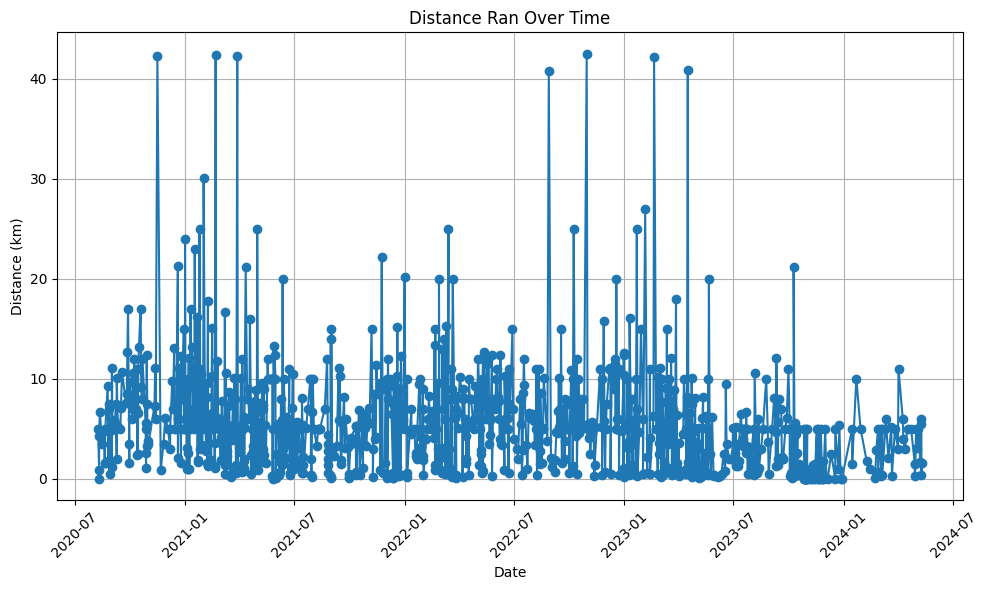

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(activities['Date'], activities['Distance'], marker='o')

# Customize the plot
plt.title('Distance Ran Over Time')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()